## Exercise 1

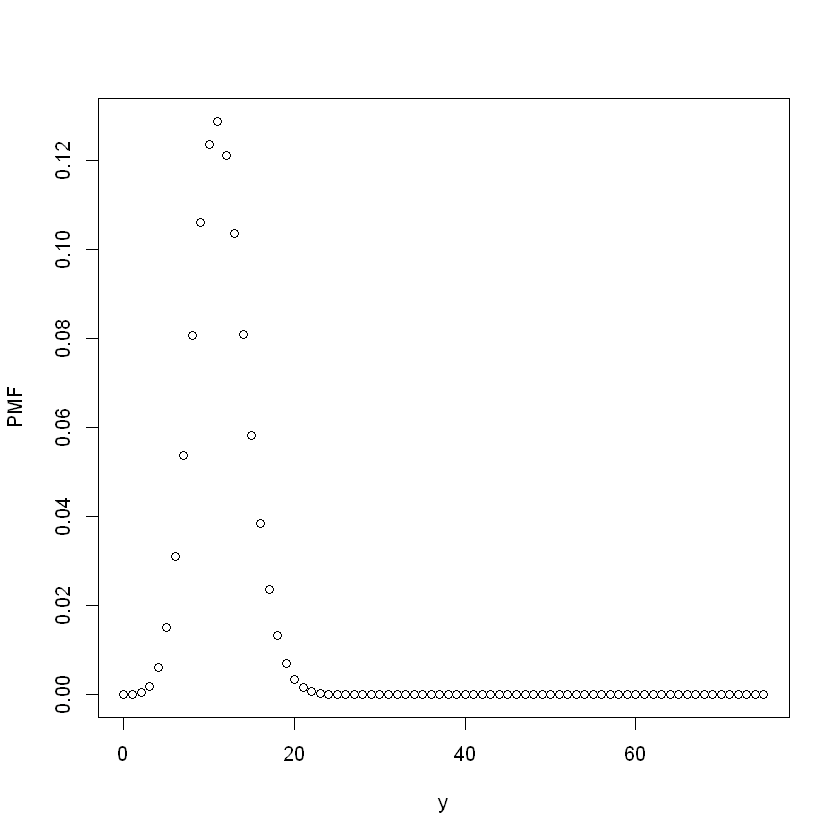

In [1]:
p <- 0.15
n <- 75
y_grid <- 0:75
new_pmf <- dbinom(y_grid, n, p) #where p is the prob of false negative
plot(y_grid, new_pmf, xlab='y', ylab='PMF')


In [2]:
#frequentist estimator
y <- 6
pf <- y / n
cat("Frequentist estimator for failure probability:", pf)

Frequentist estimator for failure probability: 0.08

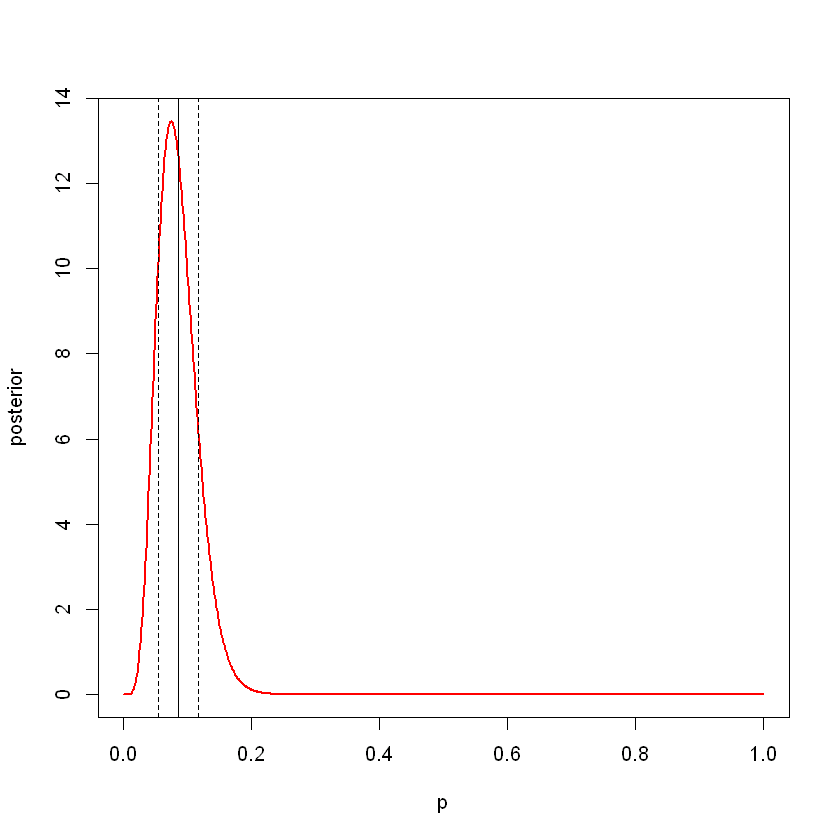

In [3]:
#bayesian
mu <- 0.15
std <- 0.14
a <- mu * ((mu * (1 - mu)) / std^2 - 1)
b <- a / mu - a

p_grid <- seq(0, 1, 0.001)

prior <- dbeta(p_grid, a, b)

a_post <- a + y
b_post <- b + n - y
posterior <- dbeta(p_grid, a_post, b_post)
plot(p_grid, posterior, type = 'l', lwd=2, col='red', xlab='p')
mu_post <- a_post / (a_post + b_post)
std_post <- sqrt(a_post * b_post / ((a_post + b_post)^2 * (a_post + b_post + 1)))
abline(v = mu_post)
abline(v = c(mu_post - std_post, mu_post + std_post), lty = 2)

0.03127933 < 0.05    reject the null hypothesis

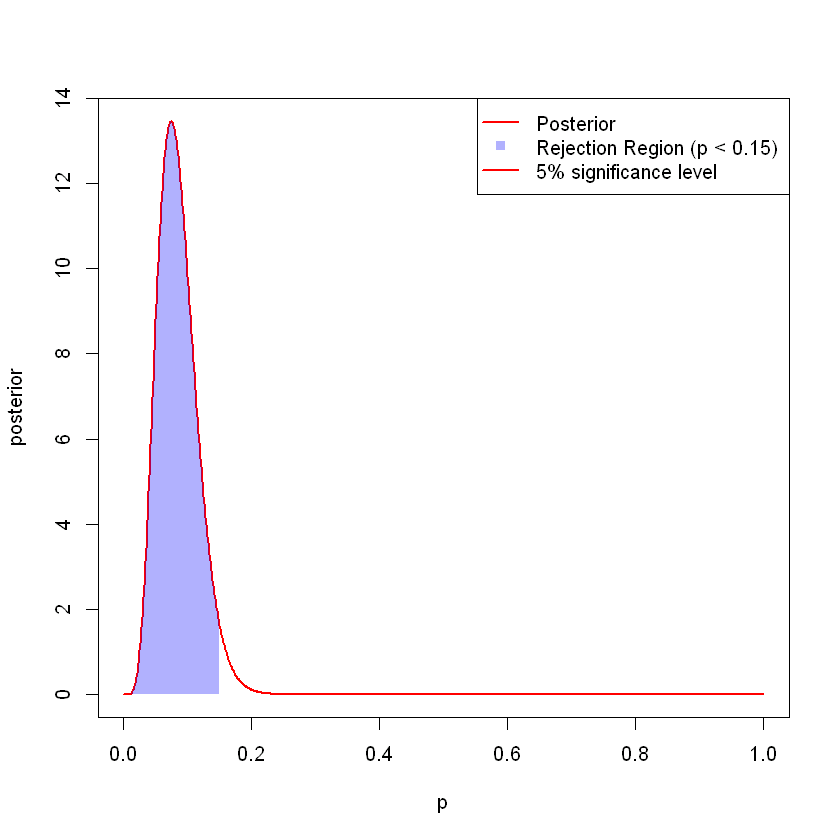

In [4]:
# hypothesis testing Bayesian approach

#H0 p>=15% no effect
#H1 p<15%

threshold_val <- pbeta(0.15, a_post, b_post)
cat(1-threshold_val, "< 0.05    reject the null hypothesis") #we are looking on the right tail

#there is strong evidence that the new method is better

plot(p_grid, posterior, type = 'l', lwd=2, col='red', xlab='p')
threshold <- 0.15
rejection_area <- p_grid[p_grid < threshold]
rejection_density <- dbeta(rejection_area, a_post, b_post)

# Shade the rejection region (p < 0.15)
polygon(c(rejection_area, rev(rejection_area)), 
        c(rejection_density, rep(0, length(rejection_density))),
        col = rgb(0, 0, 1, 0.3), border = NA)
# Add legend and annotation
legend("topright", legend = c("Posterior", "Rejection Region (p < 0.15)", "5% significance level"),
       col = c("red", rgb(0, 0, 1, 0.3)), lwd = c(2, 10), lty = c(1, NA), pch = c(NA, 15))
abline(v=)


p- value: 0.0543533 > 0.05    accept null hypothesis

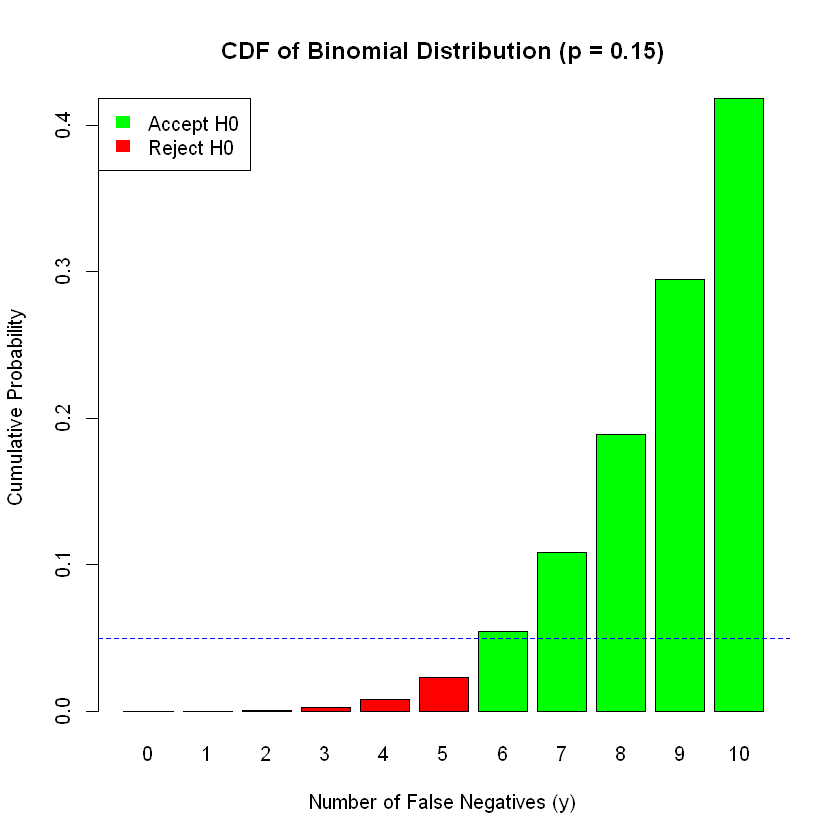

In [5]:
#HT frequentist approach

#H0 p>=15% no effect
#H1 p<15%
#5% significance level

pval <- pbinom(y, n, 0.15)    #we are taking the right tail
cat('p- value:', pval, '> 0.05    accept null hypothesis')

#plot the accept/reject regions
y_grid <- 0:10
cumf <- pbinom(y_grid, n, 0.15)

barplot(
  height = cumf,
  names.arg = y_grid,
  col = ifelse(y_grid < y, "red", "green"),
  main = "CDF of Binomial Distribution (p = 0.15)",
  xlab = "Number of False Negatives (y)",
  ylab = "Cumulative Probability"
)

# Add a horizontal line at alpha = 0.05
abline(h = 0.05, col = "blue", lty = 2)

# Add legend
legend("topleft",
       legend = c("Accept H0", "Reject H0"),
       fill = c("green", "red"),
       border = NA)

## Exercise 2

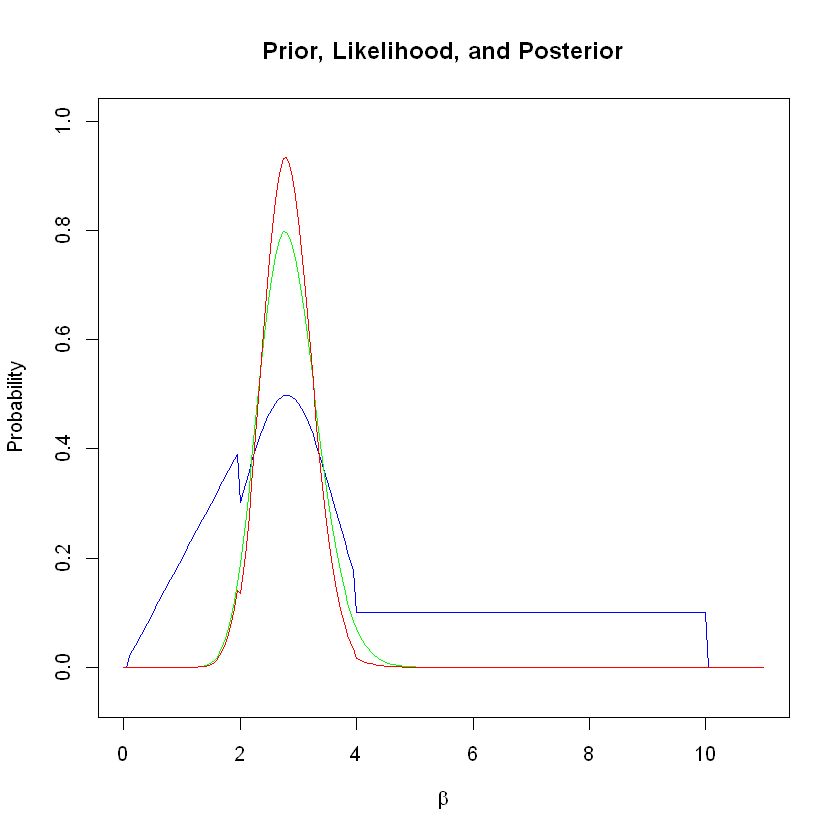

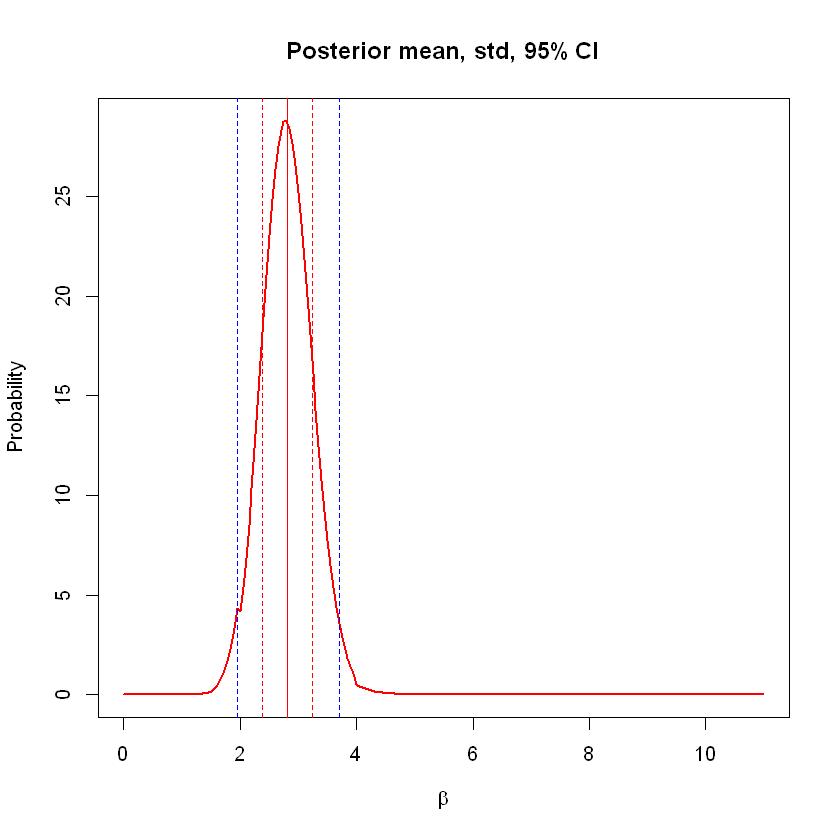

In [6]:
n <- 20
a <- 2
x <- c(0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243,
        0.294, 0.723, 0.493, 0.504, 0.428,
        0.27, 0.53,0.057, 0.585, 0.288, 0.171)

prior <- function(b){
            if(b >= 0.1 && b < 2) 0.2 * b
            else if (b >= 2 && b < 4) {
               exp(-(b - 2.8)^2 / (2 * 0.8^2)) / (0.8 * sqrt(2 * pi))
            }
            else if (b >= 4 && b <= 10) 0.1
            else 0
}
prior_vec <- Vectorize(prior)

b_grid <- seq(0, 11, 0.05)

plot(b_grid, prior_vec(b_grid), type = 'l', col='blue', ylim=c(-0.05, 1), xlab = expression(beta), ylab = 'Probability',
     main = 'Prior, Likelihood, and Posterior')

likelihood <- sapply(b_grid, function(b) prod(dbeta(x, a, b)))

norml <- sum(0.05 * likelihood)

lines(b_grid, likelihood / norml, type='l', col ='green', )

posterior <- likelihood*prior_vec(b_grid)
normp <- sum(0.05* posterior)

lines(b_grid, posterior/normp, col ='red')

plot(b_grid, posterior, type = 'l', lwd = 2, col='red', xlab = expression(beta), ylab = 'Probability',
        main = 'Posterior mean, std, 95% CI')

post_mean <- sum(posterior / normp * b_grid * 0.05)
post_var <- sum(posterior / normp * (post_mean-b_grid)^2 * 0.05)
post_std <- sqrt(post_var)
abline(v = post_mean, col='red')
abline(v = c(post_mean - post_std, post_mean + post_std), lty=2, col='red')

cdf <- cumsum(posterior/normp * 0.05)
lower_bound <- b_grid[which(cdf >= 0.025)[1]]
upper_bound <- b_grid[which(cdf >= 0.975)[1]]
abline(v = c(lower_bound, upper_bound), lty=2, col='blue')


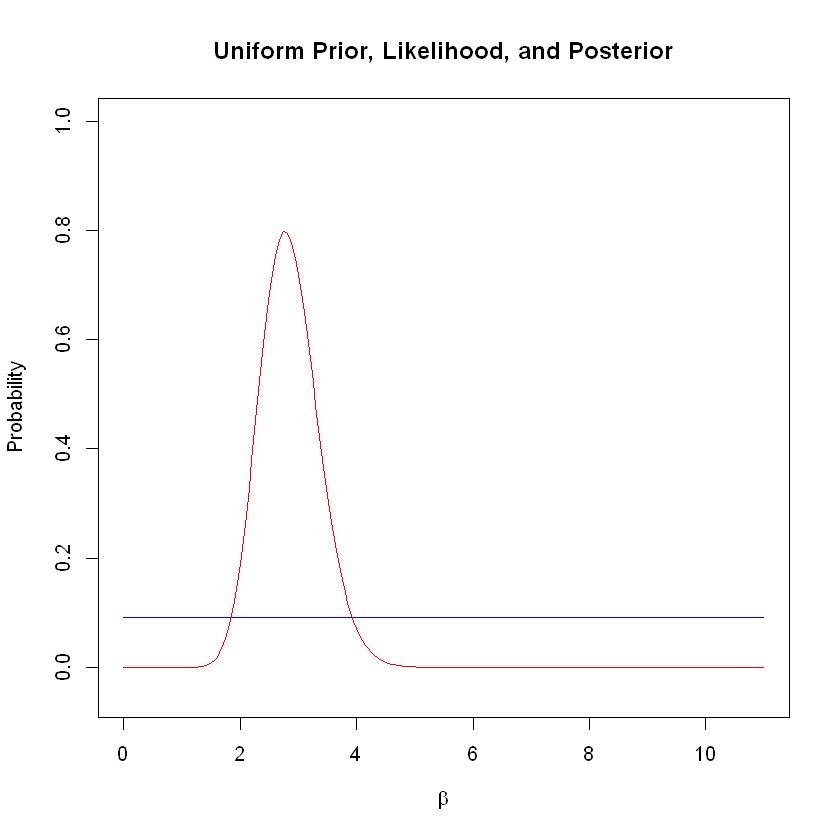

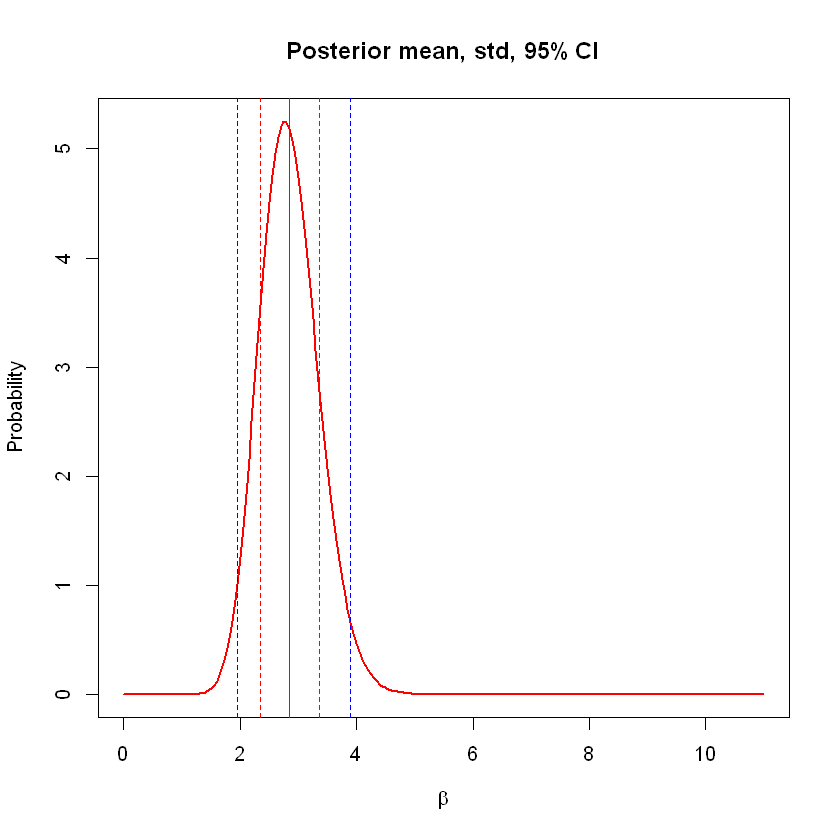

In [7]:
#UNINFORMATIVE PRIOR
uprior <- dunif(b_grid, min = 0, max = 11)

plot(b_grid, uprior, type = 'l', col='blue', ylim=c(-0.05, 1), xlab = expression(beta), ylab = 'Probability',
     main = 'Uniform Prior, Likelihood, and Posterior')


lines(b_grid, likelihood / norml, type='l', col ='green', )

uposterior <- uprior * likelihood
normp <- sum(0.05 * uposterior)

lines(b_grid, uposterior / normp, col ='red')

plot(b_grid, uposterior, type = 'l', lwd = 2, col='red', xlab = expression(beta), ylab = 'Probability',
        main = 'Posterior mean, std, 95% CI')

post_mean <- sum(uposterior / normp * b_grid * 0.05)
post_var <- sum(uposterior / normp * (post_mean-b_grid)^2 * 0.05)
post_std <- sqrt(post_var)
abline(v = post_mean, col='red')
abline(v = c(post_mean - post_std, post_mean + post_std), lty=2, col='red')

cdf <- cumsum(uposterior/normp * 0.05)
lower_bound <- b_grid[which(cdf >= 0.025)[1]]
upper_bound <- b_grid[which(cdf >= 0.975)[1]]
abline(v = c(lower_bound, upper_bound), lty=2, col='blue')


## Exercise 3

Box 5 :	 1 1 1 1 1 	Probs 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667
Trial 1	Estraction 1 
	Probs 0 0.06666667 0.1333333 0.2 0.2666667 0.3333333 


Trial 2	Estraction 1 
	Probs 0 0.01818182 0.07272727 0.1636364 0.2909091 0.4545455 


Trial 3	Estraction 1 
	Probs 0 0.004444444 0.03555556 0.12 0.2844444 0.5555556 


Trial 4	Estraction 1 
	Probs 0 0.00102145 0.01634321 0.08273749 0.2614913 0.6384065 


Trial 5	Estraction 1 
	Probs 0 0.0002259887 0.007231638 0.05491525 0.2314124 0.7062147 


Trial 6	Estraction 1 
	Probs 0 4.874482e-05 0.003119669 0.03553497 0.1996588 0.7616378 


Trial 7	Estraction 1 
	Probs 0 1.032791e-05 0.001321973 0.02258714 0.1692125 0.8068681 


Trial 8	Estraction 1 
	Probs 0 2.159925e-06 0.0005529408 0.01417127 0.1415529 0.8437208 


Trial 9	Estraction 1 
	Probs 0 4.473342e-07 0.0002290351 0.00880488 0.117266 0.8736997 


Trial 10	Estraction 1 
	Probs 0 9.196015e-08 9.41672e-05 0.005430155 0.09642721 0.8980484 


Trial 11	Estraction 1 
	Probs 0 1.87

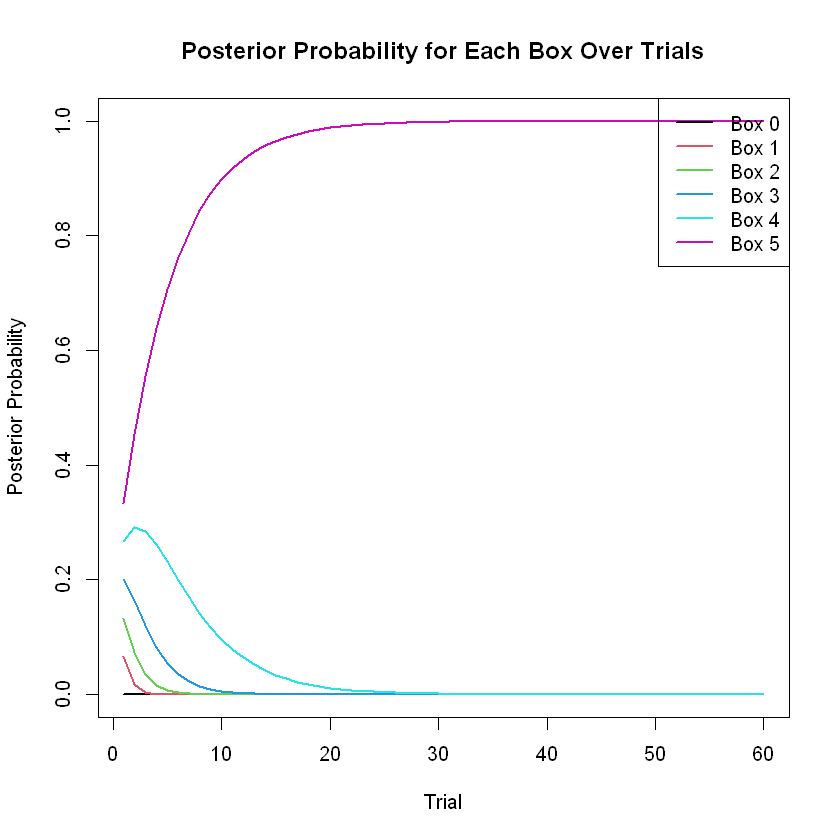

In [8]:
boxes <- vector("list", 6)

for (i in 0:5) {
  boxes[[i + 1]] <- c(rep(1, i), rep(0, 5 - i))
}

probs <- rep(1 / 6, 6)

r <- sample(0:5, 1)     #select a random box
chosenbox <- boxes[[r + 1]]

cat("Box", r, ":\t", chosenbox, "\tProbs", probs)

num_trials <- 60

posterior_matrix <- matrix(NA, nrow = num_trials, ncol = 6)
colnames(posterior_matrix) <- paste("Box", 0:5)
#make random sampling from the box
for (s in 1:num_trials){
    cat("\nTrial", s)
    e <- sample(boxes[[r + 1]], 1)
    cat("\tEstraction", e, "\n")
    for (i in 0:5){
        if (e == 1) {
            probs[i + 1] <- probs[i + 1] * (i) / 5
        }
        else {
           probs[i + 1] <- probs[i + 1] * (5 - i) / 5
        }
    }
    probs <- probs / sum(probs)     #normalize
    posterior_matrix[s, ] <- probs
    cat("\tProbs", probs,  "\n\n")
}

matplot(1:num_trials, posterior_matrix, type = 'l', lty = 1, lwd = 2,
        col = 1:6, xlab = "Trial", ylab = "Posterior Probability",
        main = "Posterior Probability for Each Box Over Trials")
legend("topright", legend = paste("Box", 0:5), col = 1:6, lty = 1, lwd = 2)